In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Globally setting print options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/DATA240 - Data Mining/Modeling and Evaluation/preprocessed_data.csv')
data.head()

,Little_interest_in_doing_things,Feeling_down_or_depressed,Trouble_sleeping_or_sleeping_too_much,Feeling_tired_or_having_little_energy,Poor_appetite_or_overeating,Feeling_bad_about_yourself,Trouble_concentrating_on_things,Moving_or_speaking_slowly_or_too_fast,Thought_you_would_be_better_off_dead,No_of_hours_you_sleep,How_often_do_you_snore,How_often_do_you_snort/stop_breathing,trouble_sleeping,Sleep_Apnea,Blood_pressure,Taking_Medication_for_HBP,current_drinker,past_drinker,current_smoker,past_smoker,Gender,Age,Education_Level,Pregnant,PIR,Race_Non-Hispanic Black,Race_Non-Hispanic White,Race_Other Hispanic,Marital_Status_Married/Living with Partner,Marital_Status_Never Married,depression_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,2,85,3,0.0,1.99,0,1,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0,2,44,3,0.0,4.65,0,1,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,70,4,0.0,5.00,0,1,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0,1,73,2,0.0,2.15,0,1,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,21,2,0.0,0.46,0,1,0,0,1,0


In [ ]:
data.shape

(24108, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24108 entries, 0 to 24107
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Little_interest_in_doing_things             24108 non-null  float64
 1   Feeling_down_or_depressed                   24108 non-null  float64
 2   Trouble_sleeping_or_sleeping_too_much       24108 non-null  float64
 3   Feeling_tired_or_having_little_energy       24108 non-null  float64
 4   Poor_appetite_or_overeating                 24108 non-null  float64
 5   Feeling_bad_about_yourself                  24108 non-null  float64
 6   Trouble_concentrating_on_things             24108 non-null  float64
 7   Moving_or_speaking_slowly_or_too_fast       24108 non-null  float64
 8   Thought_you_would_be_better_off_dead        24108 non-null  float64
 9   No_of_hours_you_sleep                       24108 non-null  float64
 10  How_often_

In [ ]:
# Check for duplicates

data.duplicated().sum()

27

In [ ]:
# Remove duplicate rows
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Little_interest_in_doing_things               0
Feeling_down_or_depressed                     0
Trouble_sleeping_or_sleeping_too_much         0
Feeling_tired_or_having_little_energy         0
Poor_appetite_or_overeating                   0
Feeling_bad_about_yourself                    0
Trouble_concentrating_on_things               0
Moving_or_speaking_slowly_or_too_fast         0
Thought_you_would_be_better_off_dead          0
No_of_hours_you_sleep                         0
How_often_do_you_snore                        0
How_often_do_you_snort/stop_breathing         0
trouble_sleeping                              0
Sleep_Apnea                                   0
Blood_pressure                                0
Taking_Medication_for_HBP                     0
current_drinker                               0
past_drinker                                  0
current_smoker                                0
past_smoker                                   0
Gender                                  

### Split data into X and y

In [ ]:
y = data['depression_category']
X = data.drop(columns=['depression_category'])

In [ ]:
X.shape, y.shape

((24081, 30), (24081,))

### Handling class imbalance - SMOTENC Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, SMOTENC

# oversampling techniques

def oversample_data(X, y, method='smote', sampling_strategy='auto', random_state=42):
    if method == 'smote':
        oversampler = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'borderline':
        oversampler = BorderlineSMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'adasyn':
        oversampler = ADASYN(sampling_strategy=sampling_strategy, random_state=random_state)
    elif method == 'smotenc':
        categorical_features = [True] * X.shape[1]
        categorical_features[1] = False
        oversampler = SMOTENC(sampling_strategy=sampling_strategy, categorical_features=categorical_features, random_state=random_state)
    else:
        raise ValueError("Invalid oversampling method")

    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    return X_resampled, y_resampled

In [ ]:
sampling_strategy = 'auto'
X_os,y_os = oversample_data(X, y, method='smote', sampling_strategy=sampling_strategy)

In [ ]:
X_os.shape, y_os.shape

((55884, 30), (55884,))

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_os, y_os, test_size=0.2, random_state=2)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=2)

In [ ]:
print('train data(X_train,y_train) shape: ',X_train.shape, y_train.shape)
print('validation data(X_valid,y_valid) shape: ',X_valid.shape, y_valid.shape)
print('test data(X_test,y_test) shape: ',X_test.shape, y_test.shape)

train data(X_train,y_train) shape:  (35765, 30) (35765,)
validation data(X_valid,y_valid) shape:  (8942, 30) (8942,)
test data(X_test,y_test) shape:  (11177, 30) (11177,)


### DT Baseline

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Train classifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict the model

y_pred_DT_baseline = model.predict(X_valid)

In [ ]:
print('Fully grown tree depth: ',model.get_depth())
print('Fully grown tree number of leaf: ',model.get_n_leaves())

Fully grown tree depth:  23
Fully grown tree number of leaf:  902


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

def metrics_calculation(y_actual, y_predicted, plot_roc_curve=True):
    #Classification report
    class_report=metrics.classification_report(y_actual,y_predicted)
    print("Classification report:\n",class_report)

    #Confusion Matrix
    conf_mat = metrics.confusion_matrix(y_actual,y_predicted,labels=None)
    print("Confusion Matrix:\n",conf_mat)

    #Confusion Matrix Display
    conf_display=metrics.ConfusionMatrixDisplay(conf_mat)
    conf_display.plot()
    plt.show()

    #Accuracy
    accuracy =metrics.accuracy_score(y_actual, y_predicted)
    print("Accuracy:",accuracy)

    #precision
    precision=metrics.precision_score(y_actual, y_predicted, average='weighted')
    print("Precision:",precision)

    #Recall
    recall=metrics.recall_score(y_actual, y_predicted, average='weighted')
    print("Recall:",recall)

    #sensitivity
    sensitivity = conf_mat[1, 1] / (conf_mat[1,1] + conf_mat[1,0])
    print("Sensitivity:",sensitivity)

    #specificity
    specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
    print("Specificity:",specificity)

    #f1-score
    f1_score = metrics.f1_score(y_actual,y_predicted, average='weighted')
    print("F1-Score:",f1_score)

    #Cohen's Kappa score
    Kappa_score= metrics.cohen_kappa_score(y_actual,y_predicted)
    print("Cohen Kappa Score:",Kappa_score)

    #G-measure
    g_measure=2*(precision*recall)/(precision+recall)
    print("G_measure:",g_measure)

    #Informedness/Youdens statistic
    informedness=sensitivity+specificity-1
    print("Informedness/Youdens statistic:",informedness)

    #Positive predictive Value
    ppv= conf_mat[1,1] / (conf_mat[1,1] + conf_mat[0,1])
    print("PPV:",ppv)

     #Negative predictive Value
    npv= conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[1,0])
    print("NPV:",npv)

    #Markedness
    marked=ppv+npv-1
    print("Markedness:",marked)

    # Matthews Correlation Coefficient
    mcc=((conf_mat[0, 0] * conf_mat[1, 1]) - (conf_mat[0, 1] * conf_mat[1, 0]))/np.sqrt((conf_mat[0, 0] + conf_mat[0, 1])
        * (conf_mat[0, 0] + conf_mat[1, 0]) * (conf_mat[1, 1] + conf_mat[1, 0]) * (conf_mat[1, 1] + conf_mat[0, 1]))
    print("Matthews Correlation Coefficient",mcc)

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2927
           1       0.96      0.95      0.95      3006
           2       0.97      0.97      0.97      3009

    accuracy                           0.97      8942
   macro avg       0.97      0.97      0.97      8942
weighted avg       0.97      0.97      0.97      8942

Confusion Matrix:
 [[2888   39    0]
 [  60 2845  101]
 [   1   75 2933]]


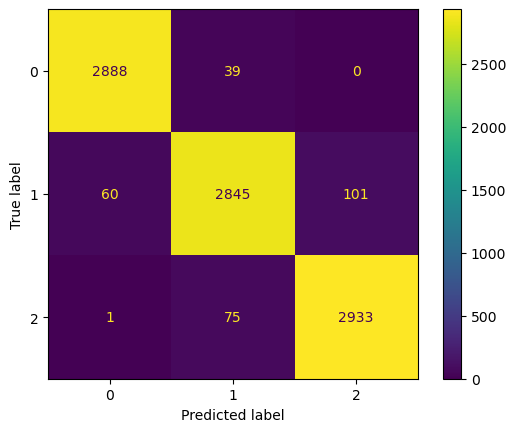

Accuracy: 0.9691344218295683
Precision: 0.9690758842892916
Recall: 0.9691344218295683
Sensitivity: 0.9793459552495697
Specificity: 0.9866757772463273
F1-Score: 0.9690751425955508
Cohen Kappa Score: 0.9536993208767719
G_measure: 0.9691051521754589
Informedness/Youdens statistic: 0.9660217324958968
PPV: 0.9864771151178918
NPV: 0.9796472184531886
Markedness: 0.9661243335710803
Matthews Correlation Coefficient 0.9660730316714047


In [ ]:
metrics_calculation(y_valid, y_pred_DT_baseline, True)

ROC-AUC Score: 0.9769148459342843


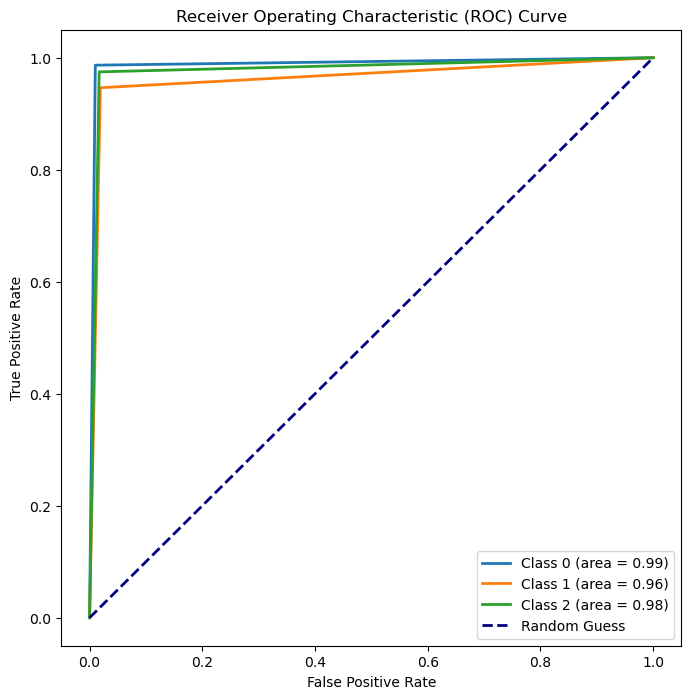

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Predict probabilities for the test data
y_pred_proba_DT_baseline = model.predict_proba(X_valid)

# Binarizing the output labels for multi-class
classes = np.unique(y_train)
y_valid_binarized = label_binarize(y_valid, classes=classes)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_valid_binarized, y_pred_proba_DT_baseline, multi_class='ovo')
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve for each class
plt.figure(figsize=(8, 8))
for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_valid_binarized[:, i], y_pred_proba_DT_baseline[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_name} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Hyperparameter tuning

In [ ]:
# defining a grid search like function for decision tree to get hyper parameters
def dt_grid_search(max_depth_array, min_s_leaf_array, criterions_array, params, X_train, X_test, y_train, y_test):
  for k in range(0,len(criterions_array)):
    for i in range(0, len(max_depth_array)):
      for j in range(0,len(min_s_leaf_array)):
        max_depth_val = max_depth_array[i]
        min_s_leaf_val = min_s_leaf_array[j]
        criterion_val = criterions_array[k]
        d_tree_clf = DecisionTreeClassifier(max_depth=max_depth_val, min_samples_leaf=min_s_leaf_val, criterion=criterion_val, random_state=2023)#####
        d_tree_clf = d_tree_clf.fit(X_train,y_train)
        y_pred = d_tree_clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        F1_score = metrics.f1_score(y_test, y_pred, average='macro')
        precision = metrics.precision_score(y_test, y_pred, average='macro')
        recall = metrics.recall_score(y_test, y_pred, average='macro')
        parameters_dict = {'criterion':criterion_val, 'max_depth':max_depth_val, 'min_samples_leaf': min_s_leaf_val, 'accuracy': accuracy, 'F1_score':F1_score, 'precision':precision, 'recall':recall}
        params.append(parameters_dict)
        print(f'criterion:{criterion_val}, max_depth:{max_depth_val}, min_samples_leaf:{min_s_leaf_val}, accuracy:{accuracy}, F1_score:{F1_score}')

In [ ]:
# Hyperparameters
max_depth_array = [2,4,6,8,10]
min_s_leaf_array = [5,10,15]
criterions_array = ['gini','entropy']
params = list()

dt_grid_search(max_depth_array, min_s_leaf_array, criterions_array, params, X_train, X_valid, y_train, y_valid)

criterion:gini, max_depth:2, min_samples_leaf:5, accuracy:0.7644822187430105, F1_score:0.7611022865530798
criterion:gini, max_depth:2, min_samples_leaf:10, accuracy:0.7644822187430105, F1_score:0.7611022865530798
criterion:gini, max_depth:2, min_samples_leaf:15, accuracy:0.7644822187430105, F1_score:0.7611022865530798
criterion:gini, max_depth:4, min_samples_leaf:5, accuracy:0.8574144486692015, F1_score:0.8597936498353184
criterion:gini, max_depth:4, min_samples_leaf:10, accuracy:0.8574144486692015, F1_score:0.8597936498353184
criterion:gini, max_depth:4, min_samples_leaf:15, accuracy:0.8574144486692015, F1_score:0.8597936498353184
criterion:gini, max_depth:6, min_samples_leaf:5, accuracy:0.9055021248042944, F1_score:0.9067972418130624
criterion:gini, max_depth:6, min_samples_leaf:10, accuracy:0.905725788414225, F1_score:0.9070165382576216
criterion:gini, max_depth:6, min_samples_leaf:15, accuracy:0.9036009841198837, F1_score:0.9048826407844889
criterion:gini, max_depth:8, min_samples_

In [ ]:
from operator import itemgetter
from tabulate import tabulate

# lets sort the metrics in descending order
param_sorted = sorted(params, key=itemgetter('F1_score'), reverse=True)
df = pd.DataFrame.from_dict(param_sorted)
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

# optimal set of hyperparameters will be the top value in the sorted parameter list
opt_hparams = param_sorted[0]
print('**'*60)
print(f'\noptimal hyper-parameters: {opt_hparams}\n')
print('**'*60)

+----+-------------+-------------+--------------------+------------+------------+-------------+----------+
|    | criterion   |   max_depth |   min_samples_leaf |   accuracy |   F1_score |   precision |   recall |
|----+-------------+-------------+--------------------+------------+------------+-------------+----------|
|  0 | entropy     |          10 |                  5 |   0.964102 |   0.964234 |    0.964179 | 0.96431  |
|  1 | entropy     |          10 |                 10 |   0.961754 |   0.961896 |    0.961863 | 0.961968 |
|  2 | entropy     |          10 |                 15 |   0.958287 |   0.958461 |    0.958434 | 0.958501 |
|  3 | gini        |          10 |                  5 |   0.95113  |   0.951384 |    0.951622 | 0.951221 |
|  4 | gini        |          10 |                 10 |   0.950459 |   0.950738 |    0.951034 | 0.950547 |
|  5 | gini        |          10 |                 15 |   0.947104 |   0.947418 |    0.947753 | 0.947197 |
|  6 | entropy     |           8 |   

### Cross validation

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

def cross_validation_func(model, X_train, y_train, c_v=5):
    # Use StratifiedKFold for balanced splits
    stratified_k_fold = StratifiedKFold(n_splits=c_v, shuffle=True, random_state=2023)

    # Define custom scorers with averaging method for multi-class settings
    scoring_array = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='macro'),  # Change 'macro' to 'micro' or 'weighted' as needed
        'recall': make_scorer(recall_score, average='macro'),
        'f1': make_scorer(f1_score, average='macro')
    }

    results_scores = cross_validate(estimator=model,
                                    X=X_train,
                                    y=y_train,
                                    cv=stratified_k_fold,
                                    scoring=scoring_array,
                                    return_train_score=True)

    return {
        "Mean Train Accuracy": results_scores['train_accuracy'].mean(),
        "Mean Train Precision": results_scores['train_precision'].mean(),
        "Mean Train Recall": results_scores['train_recall'].mean(),
        "Mean Train F1 Score": results_scores['train_f1'].mean(),
        "Mean Valid Accuracy": results_scores['test_accuracy'].mean()*100,
        "Mean Valid Precision": results_scores['test_precision'].mean(),
        "Mean Valid Recall": results_scores['test_recall'].mean(),
        "Mean Valid F1 Score": results_scores['test_f1'].mean()
    }

In [ ]:
# using the optimal hyperparameters test the model robustness using k-fold cross validation
model_tuned = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, criterion='entropy', random_state=2023)
model_tuned.fit(X_train_full, y_train_full)
cross_validation_func(model_tuned, X_train_full, y_train_full, 5)

{'Mean Train Accuracy': 0.9747578626685398,
 'Mean Train Precision': 0.9747943454749262,
 'Mean Train Recall': 0.9747904937661627,
 'Mean Train F1 Score': 0.9747834022577928,
 'Mean Valid Accuracy': 96.12364897836312,
 'Mean Valid Precision': 0.9612989822216434,
 'Mean Valid Recall': 0.9612922132256042,
 'Mean Valid F1 Score': 0.9612735504471681}

### Testing DT with optimal hyperparameters on unseen data

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color='orange')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='orange', label='Validation Score')
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

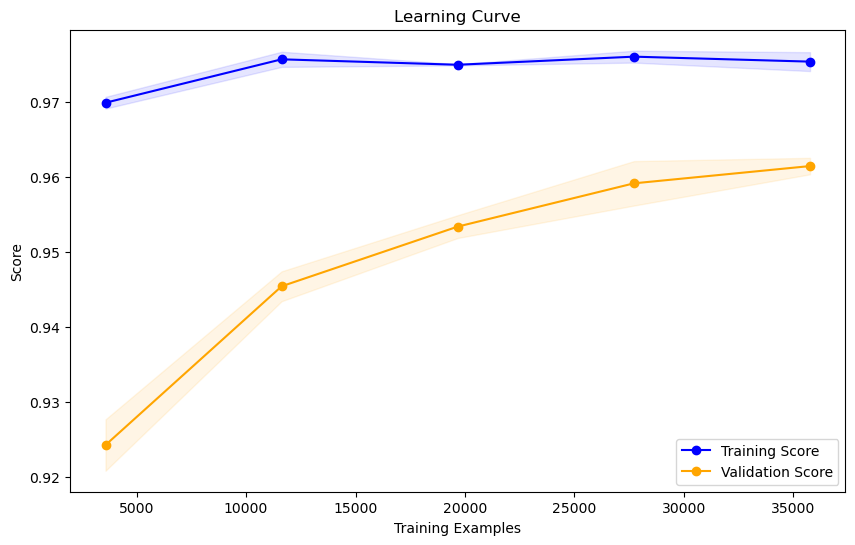

In [ ]:
model_opt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, criterion='entropy', random_state=2023)
model_opt.fit(X_train_full, y_train_full)
y_pred_DT_opt = model.predict(X_test)
plot_learning_curve(model_opt, X_train_full, y_train_full, cv=5)

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3815
           1       0.95      0.95      0.95      3720
           2       0.97      0.97      0.97      3642

    accuracy                           0.97     11177
   macro avg       0.97      0.97      0.97     11177
weighted avg       0.97      0.97      0.97     11177

Confusion Matrix:
 [[3745   70    0]
 [  58 3542  120]
 [   1  102 3539]]


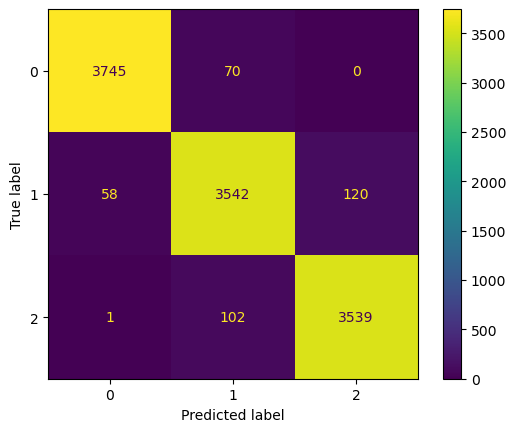

Accuracy: 0.968596224389371
Precision: 0.9686059812084646
Recall: 0.968596224389371
Sensitivity: 0.9838888888888889
Specificity: 0.981651376146789
F1-Score: 0.9685984840811241
Cohen Kappa Score: 0.9528871852981169
G_measure: 0.9686011027743474
Informedness/Youdens statistic: 0.9655402650356779
PPV: 0.9806201550387597
NPV: 0.9847488824612148
Markedness: 0.9653690374999746
Matthews Correlation Coefficient 0.9654546474718336


In [ ]:
metrics_calculation(y_test, y_pred_DT_opt, True)

ROC-AUC Score: 0.9764192278102536


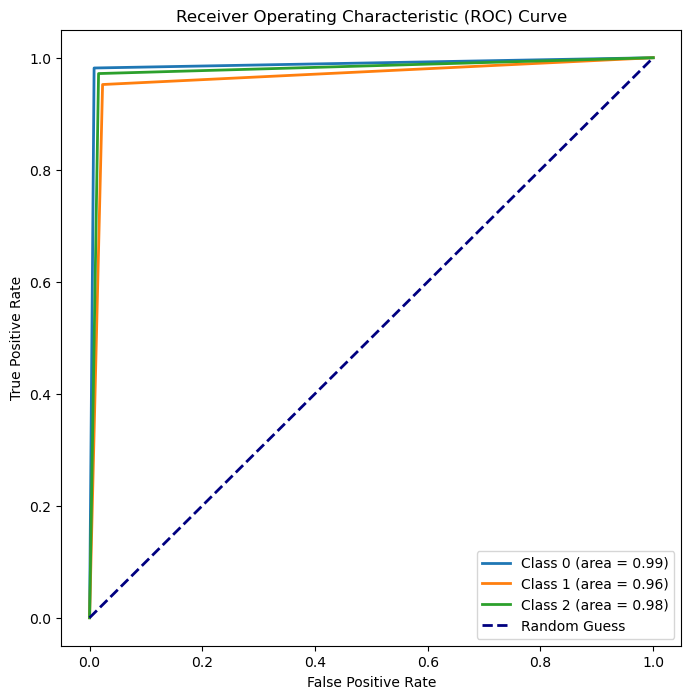

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Predict probabilities for the test data
y_pred_proba_DT_opt = model.predict_proba(X_test)

# Binarizing the output labels for multi-class
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba_DT_opt, multi_class='ovo')
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve for each class
plt.figure(figsize=(8, 8))
for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba_DT_opt[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_name} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()